<a href="https://colab.research.google.com/github/dariashcherbakovaaa/MA_DSE_Unimi/blob/LABs/softlab_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
data = pd.read_csv('/content/SP 500 ESG Risk Ratings.csv')
print(f"Shape of the dataset: {data.shape}")
data.head(5)

Shape of the dataset: (503, 15)


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,433.00,433.00,433.00,433.00,433.00
mean,21.42,5.68,6.67,9.05,1.90
std,7.26,5.34,2.20,3.81,0.94
min,7.00,0.00,3.00,1.10,0.00
25%,16.00,1.50,5.00,6.60,1.00
50%,21.00,3.80,6.00,8.70,2.00
75%,26.00,8.90,7.70,11.60,2.00
max,46.00,25.00,15.50,21.00,5.00


In [9]:
sectors = data['Sector'].nunique()
print("Number of Sectors:", sectors)

industies = data['Industry'].nunique()
print('Number of Industries:' , industies)

companies = data['Name'].nunique()
print('Number of Companies:', companies)

Number of Sectors: 11
Number of Industries: 114
Number of Companies: 503


In [12]:
data['Sector'].value_counts().reset_index()

,Sector,count
0,Technology,75
1,Industrials,70
2,Healthcare,67
3,Financial Services,67
4,Consumer Cyclical,58
5,Consumer Defensive,36
6,Real Estate,31
7,Utilities,30
8,Communication Services,23
9,Basic Materials,22


In [13]:
# using Plotly Express
sector_counts = data['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Frequency']

# Create a bar chart using Plotly Express
fig = px.bar(sector_counts, x='Frequency', y='Sector', orientation='h',
             title='S&P 500 Sectors', text='Frequency',
             labels={'Frequency': 'Frequency Count', 'Sector': 'Sector'},
             color='Frequency', color_continuous_scale=px.colors.sequential.YlOrBr)

# Customize the layout

fig.update_layout(showlegend=False)

# Show the plot
fig.show()

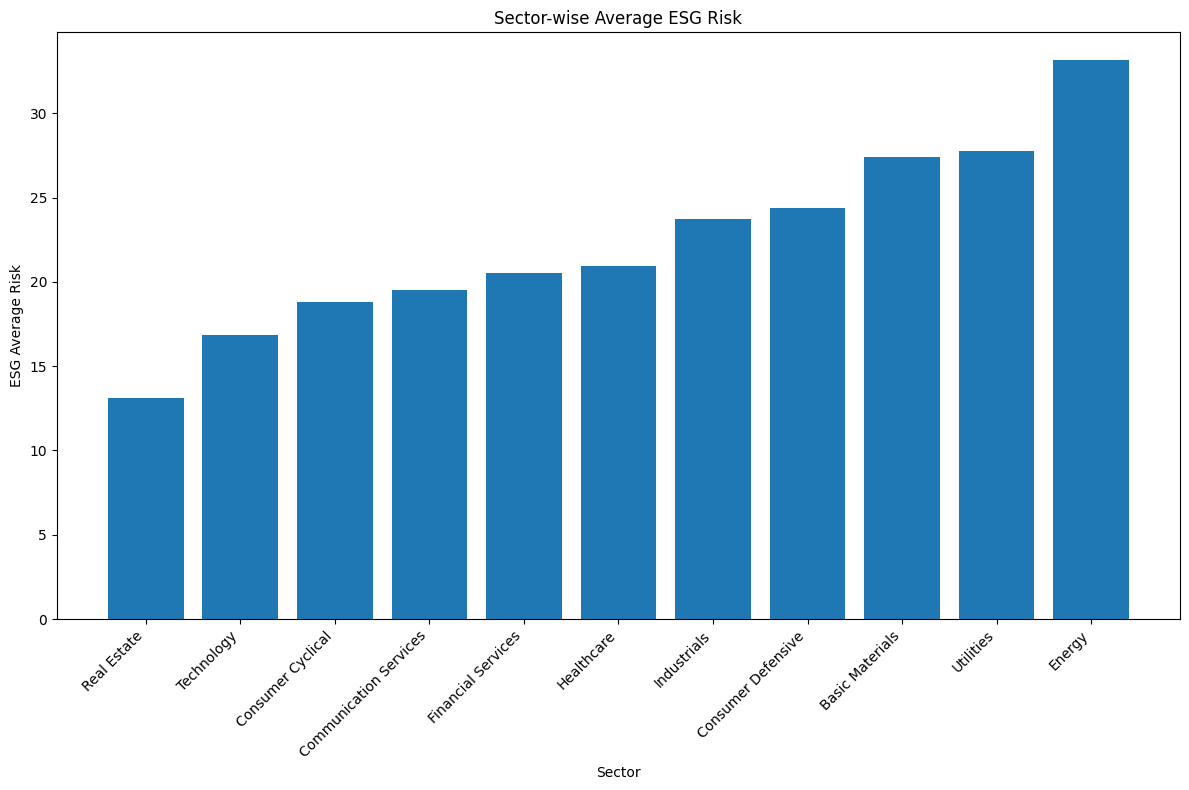

In [14]:
# using matplotlib
sector_wise_risk = data.groupby('Sector')['Total ESG Risk score'].mean().sort_values()

# we create a bar plot for the sector-wise average ESG risk scores
plt.figure(figsize=(12, 8))
plt.bar(sector_wise_risk.index, sector_wise_risk.values)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Sector-wise Average ESG Risk')
plt.xlabel('Sector')
plt.ylabel('ESG Average Risk')
plt.tight_layout()
plt.show()

<ipython-input-15-50251ed8389d>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




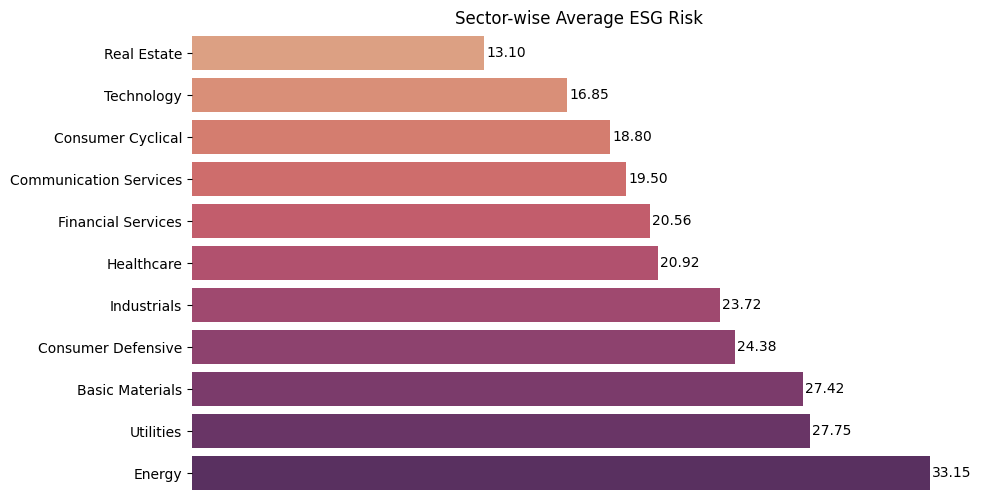

In [15]:
#using seaborn

# Group the data by 'Sector' and calculate the median for 'Total ESG Risk score'
sector_wise_risk = data.groupby('Sector')['Total ESG Risk score'].mean().sort_values(ascending= True)
palette = sns.color_palette("rocket_r")  # Convert to a list of colors
# Create a bar plot for the sector-wise median ESG risk scores
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_wise_risk.values, y=sector_wise_risk.index, palette='flare')
plt.title('Sector-wise Average ESG Risk')
plt.xlabel('Average Total ESG Risk Score')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.xticks([])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

# Add labels to the bars
for index, value in enumerate(sector_wise_risk.values):
    plt.text(value + 0.1 , index, f'{value:.2f}', ha='left', va='center')

plt.show()

<Axes: >

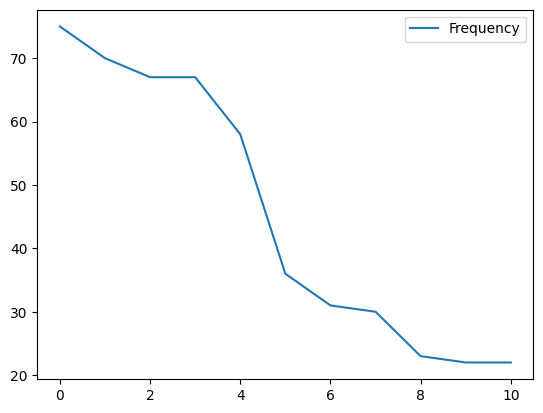

In [16]:
sector_counts.plot()

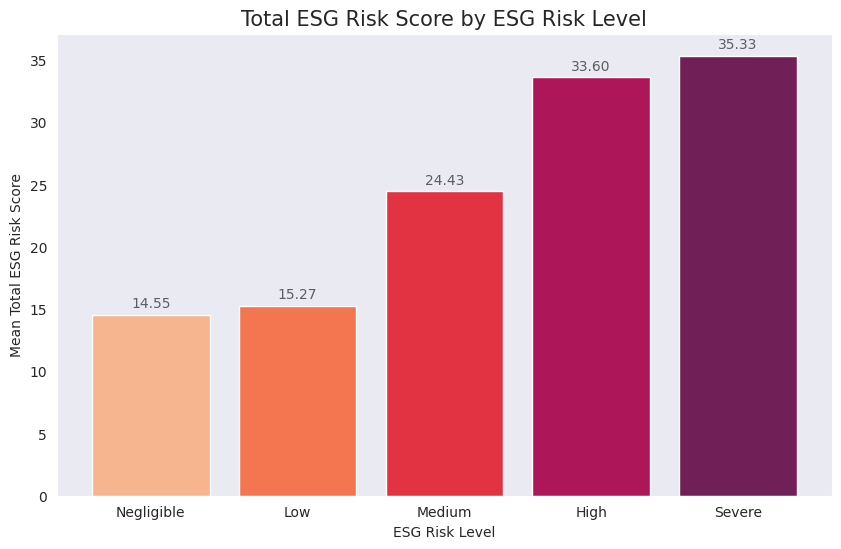

In [18]:
# Group by 'ESG Risk Level' and calculate the mean 'Total ESG Risk Score' for each level
grouped_data = data.groupby('ESG Risk Level')['Total ESG Risk score'].mean().reset_index()

# Define the ESG risk levels
risk_levels = ['Negligible', 'Low', 'Medium', 'High', 'Severe']

sns.set_style("dark")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Sort the grouped data by ESG Risk Level in the desired order
grouped_data = grouped_data.loc[grouped_data['ESG Risk Level'].isin(risk_levels)]
grouped_data = grouped_data.set_index('ESG Risk Level').loc[risk_levels].reset_index()

# Use a Seaborn color palette
palette = sns.color_palette("rocket_r")  # Convert to a list of colors

# Create a bar chart for 'Total ESG Risk Score' for each risk level with the Seaborn palette
bars = ax.bar(grouped_data['ESG Risk Level'], grouped_data['Total ESG Risk score'], color=palette)

# Add labels and title
plt.xlabel('ESG Risk Level')
plt.ylabel('Mean Total ESG Risk Score')
plt.title('Total ESG Risk Score by ESG Risk Level', fontsize=15)


# Add data labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10,
                color='black', alpha=0.6)

# Show the plot
plt.show()

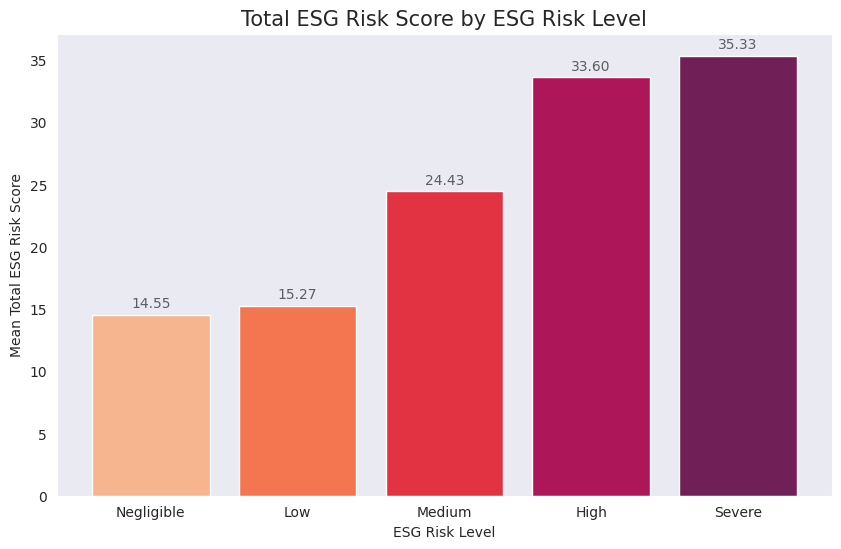

In [19]:
# Group by 'ESG Risk Level' and calculate the mean 'Total ESG Risk Score' for each level
grouped_data = data.groupby('ESG Risk Level')['Total ESG Risk score'].mean().reset_index()

# Define the ESG risk levels
risk_levels = ['Negligible', 'Low', 'Medium', 'High', 'Severe']

sns.set_style("dark")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Sort the grouped data by ESG Risk Level in the desired order
grouped_data = grouped_data.loc[grouped_data['ESG Risk Level'].isin(risk_levels)]
grouped_data = grouped_data.set_index('ESG Risk Level').loc[risk_levels].reset_index()

# Use a Seaborn color palette
palette = sns.color_palette("rocket_r")  # Convert to a list of colors

# Create a bar chart for 'Total ESG Risk Score' for each risk level with the Seaborn palette
bars = ax.bar(grouped_data['ESG Risk Level'], grouped_data['Total ESG Risk score'], color=palette)

# Add labels and title
plt.xlabel('ESG Risk Level')
plt.ylabel('Mean Total ESG Risk Score')
plt.title('Total ESG Risk Score by ESG Risk Level', fontsize=15)


# Add data labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10,
                color='black', alpha=0.6)

# Show the plot
plt.show()

<ipython-input-20-6a749db71931>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



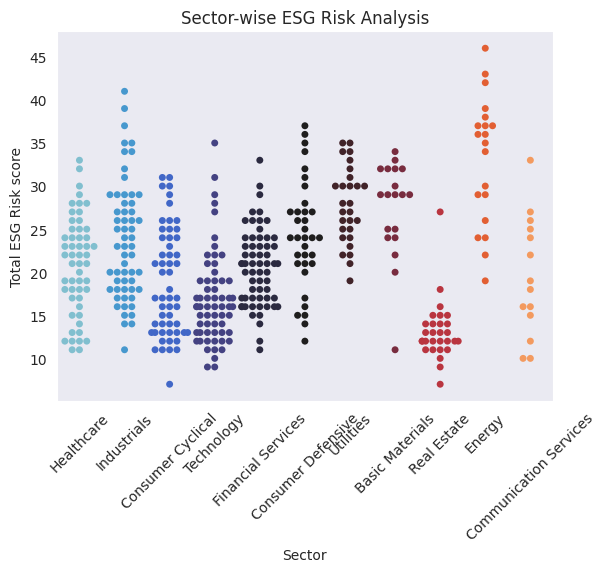

In [20]:
# Categorical scatterplots
plot = sns.swarmplot(x="Sector", y="Total ESG Risk score", data = data, palette = "icefire")
plt.setp(plot.get_xticklabels(), rotation=45)
plt.title('Sector-wise ESG Risk Analysis')
plt.show()

<ipython-input-21-7644dedd54ca>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-21-7644dedd54ca>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



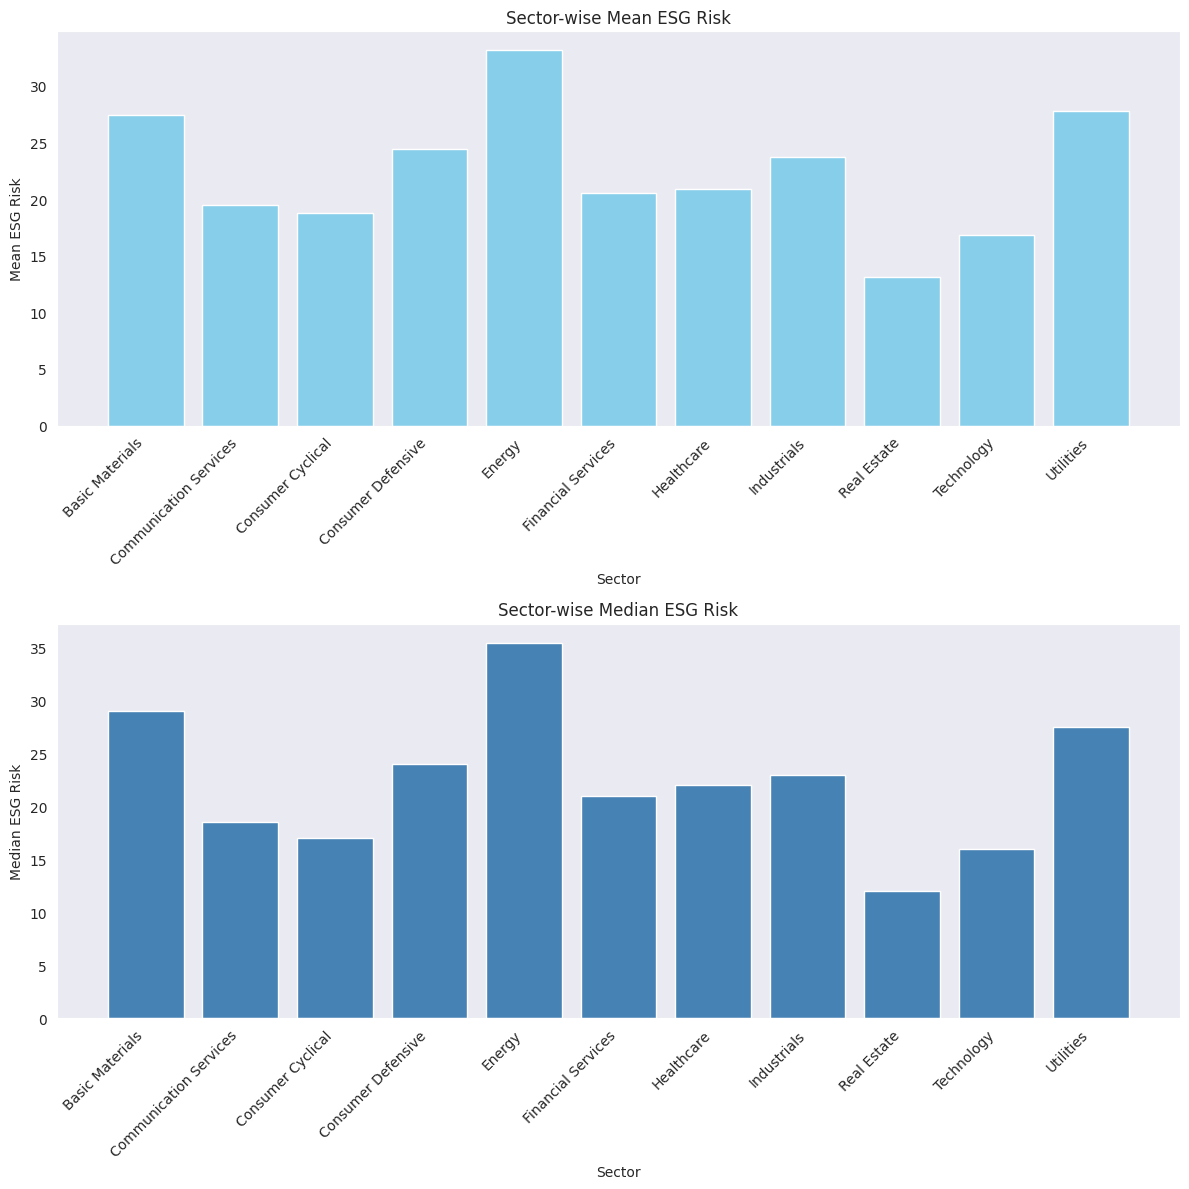

In [21]:
#checking for presence of outliers (matplotlib)

# Group the data by 'Sector' and calculate the mean and median for 'Total ESG Risk score'
sector_wise_mean = data.groupby('Sector')['Total ESG Risk score'].mean()
sector_wise_median = data.groupby('Sector')['Total ESG Risk score'].median()

# Create subplots for mean and median bar plots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot mean bar plot
axes[0].bar(sector_wise_mean.index, sector_wise_mean.values, color='skyblue')
axes[0].set_xticklabels(sector_wise_mean.index, rotation=45, ha='right')
axes[0].set_title('Sector-wise Mean ESG Risk')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Mean ESG Risk')

# Plot median bar plot
axes[1].bar(sector_wise_median.index, sector_wise_median.values, color='steelblue')
axes[1].set_xticklabels(sector_wise_median.index, rotation=45, ha='right')
axes[1].set_title('Sector-wise Median ESG Risk')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Median ESG Risk')

plt.tight_layout()
plt.show()


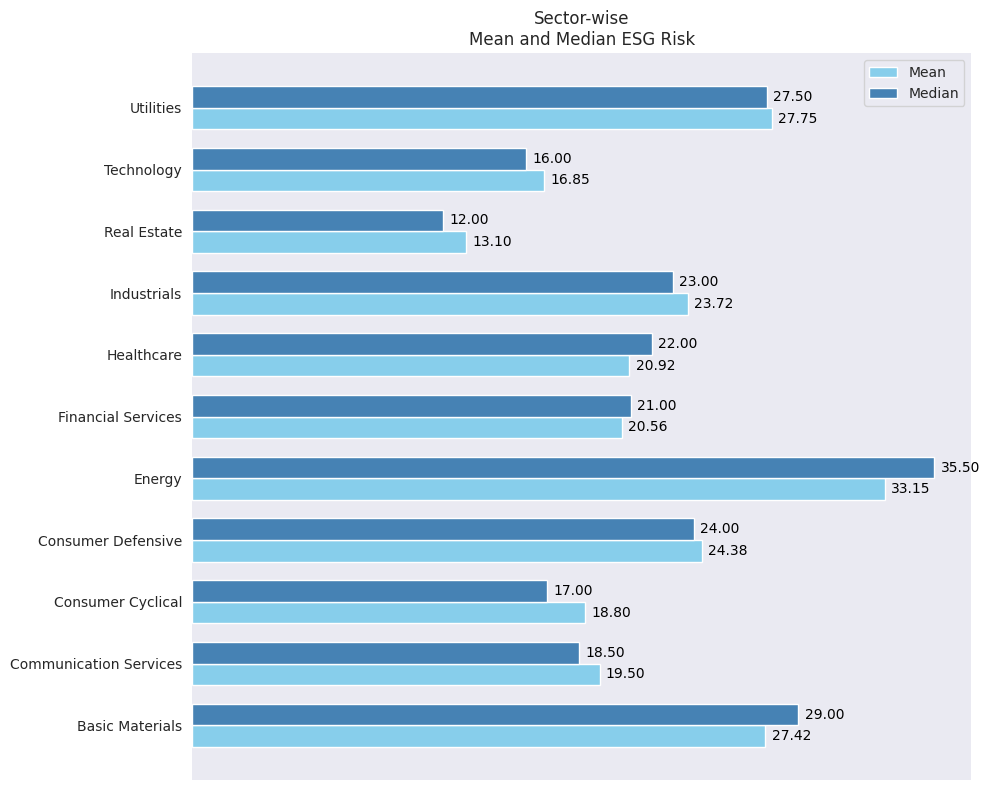

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Sector' and calculate the mean and median for 'Total ESG Risk score'
sector_stats = data.groupby('Sector')['Total ESG Risk score'].agg(['mean', 'median']).reset_index()

# Set figure size
plt.figure(figsize=(10, 8))

# Plot grouped bar plot
bars1 = plt.barh(sector_stats.index - 0.175, sector_stats['mean'], 0.35, color='skyblue', label='Mean')
bars2 = plt.barh(sector_stats.index + 0.175, sector_stats['median'], 0.35, color='steelblue', label='Median')

plt.title('Sector-wise\nMean and Median ESG Risk')
plt.xlabel('')
plt.xticks([])
plt.yticks(sector_stats.index, sector_stats['Sector'])
plt.legend()

# Add data labels for mean and median values
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center', color='black')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

plt.tight_layout()
plt.show()


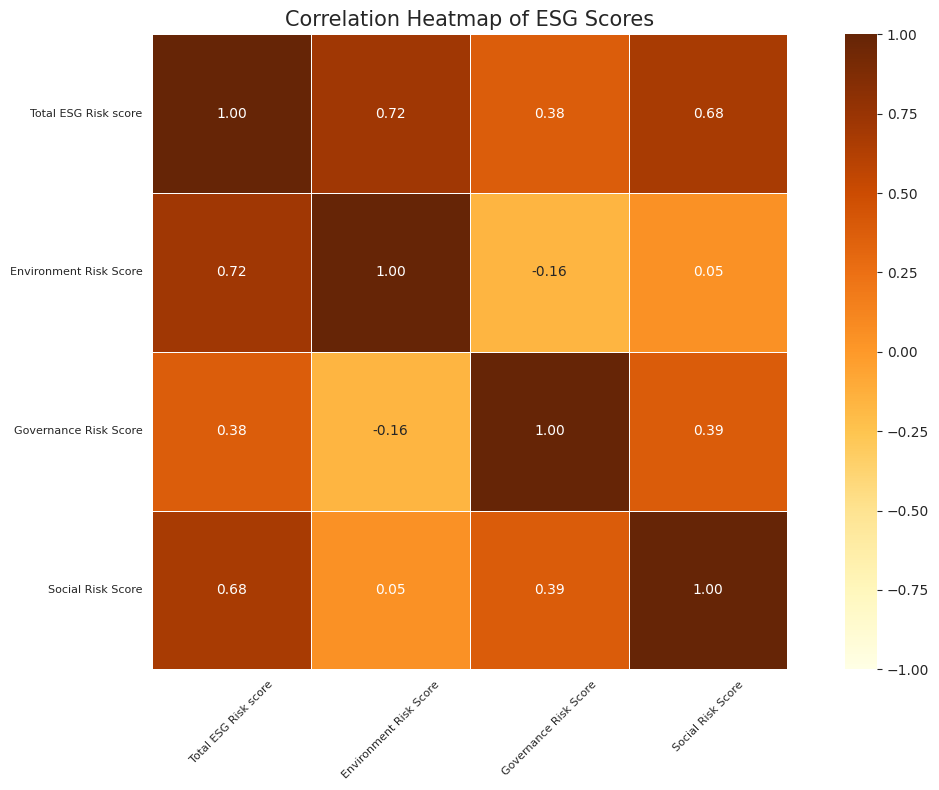

In [23]:
esg_scores = data[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]
plt.figure(figsize=(12, 8))
sns.set_style("dark")

# Create the correlation matrix
corr = esg_scores.corr()

cmap=sns.color_palette("YlOrBr", as_cmap=True)

sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", cbar=True, linewidths=0.5, square=True, vmin=-1, vmax=1)

plt.title("Correlation Heatmap of ESG Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

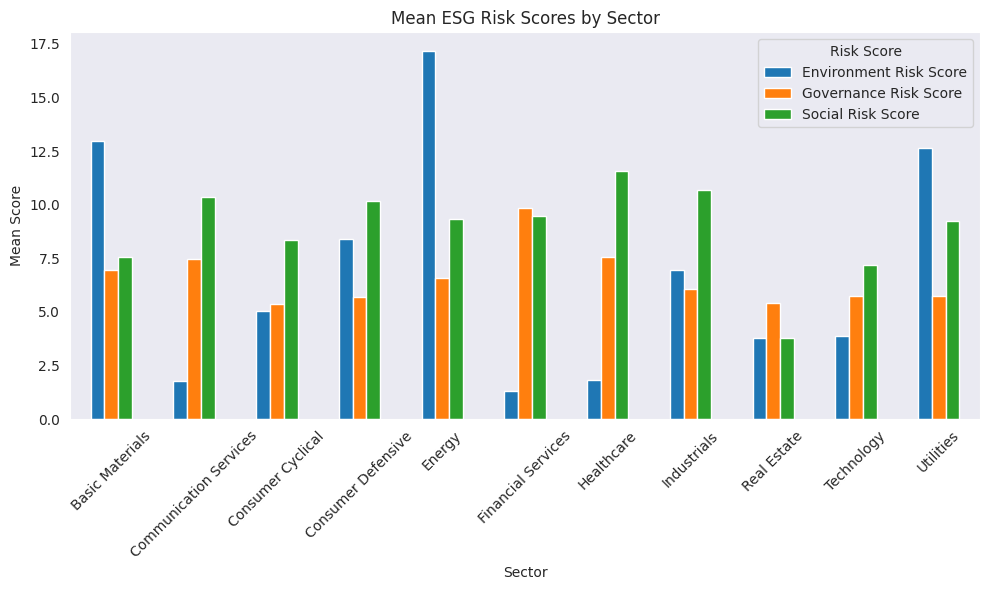

In [24]:
# Group by sector and calculate mean scores
sector_scores = data.groupby('Sector')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean()

# Plotting
sector_scores.plot(kind='bar', figsize=(10, 6))
plt.title('Mean ESG Risk Scores by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Risk Score')
plt.tight_layout()
plt.show()


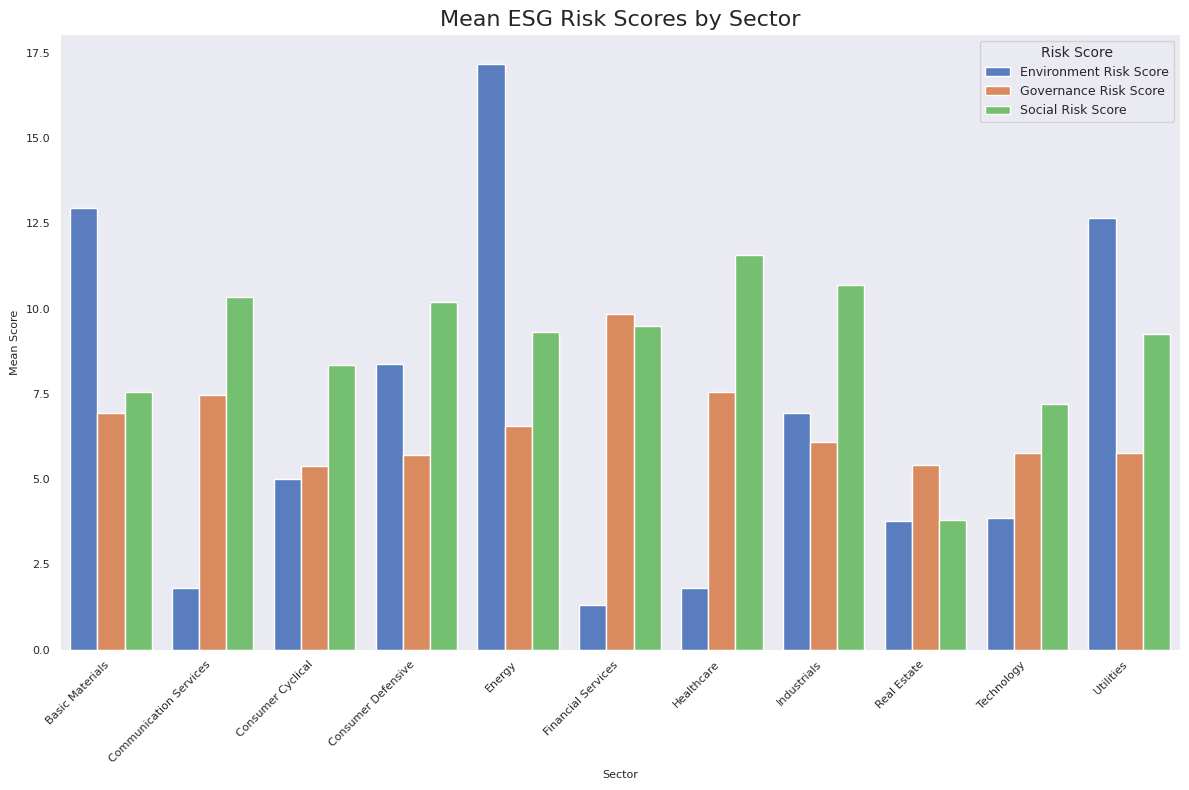

In [25]:


# Group by sector and calculate mean scores
sector_scores = data.groupby('Sector')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

# Melt the dataframe for better visualization
melted_df = pd.melt(sector_scores, id_vars='Sector', var_name='Risk Score', value_name='Mean Score')

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Sector', y='Mean Score', hue='Risk Score', data=melted_df, palette='muted')
plt.title('Mean ESG Risk Scores by Sector', fontsize=16)
plt.xlabel('Sector', fontsize=8)
plt.ylabel('Mean Score', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Risk Score', fontsize=9)
plt.tight_layout()
plt.show()


In [26]:
# Plotting with Plotly
fig = px.bar(melted_df, x='Sector', y='Mean Score', color='Risk Score', barmode='group',
             labels={'Mean Score': 'Mean Score', 'Sector': 'Sector', 'Risk Score': 'Risk Score'},
             title='Mean ESG Risk Scores by Sector')
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickfont=dict(size=8)), yaxis=dict(tickfont=dict(size=8)),
                  legend=dict(title='Risk Score', font=dict(size=9)))
fig.show()


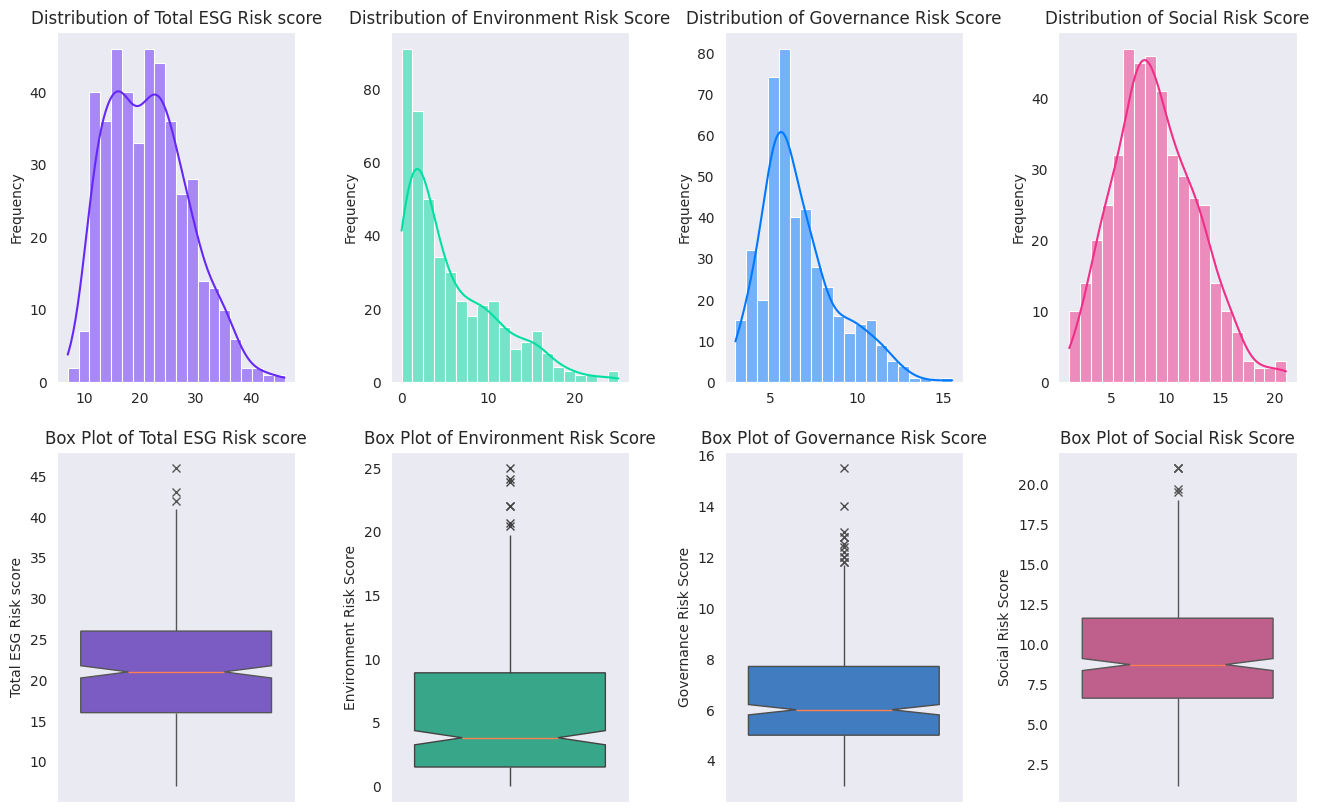

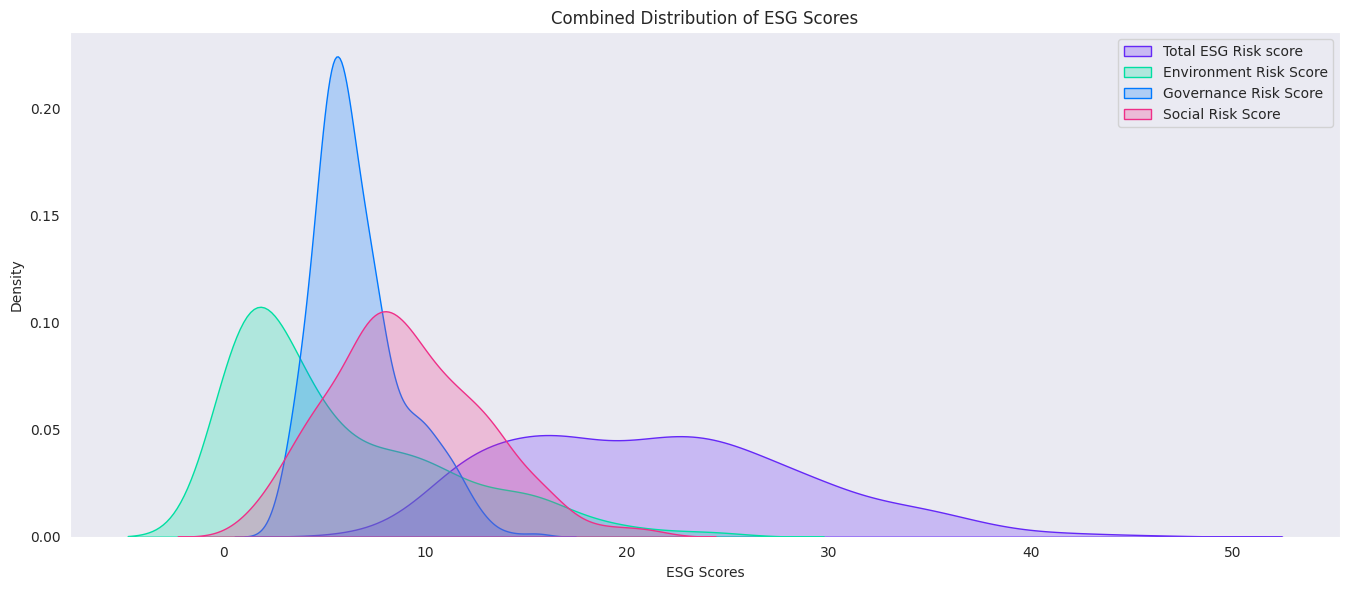

In [27]:


# Set style
sns.set_style("dark")

# Define a custom color palette
colors = ["#6528F7", "#00DFA2", "#0079FF", "#EF2F88"]


# Create subplots for histograms and distribution plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.4)

# Iterate through each ESG score column
for i, col in enumerate(esg_scores.columns):
    # Plot histogram
    sns.histplot(
        esg_scores[col],
        bins=20,
        kde=True,
        ax=axes[0, i],
        color=colors[i]
    )
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].set_title(f'Distribution of {col}')


    # Plot box plot with the same color
    sns.boxplot(
        y=esg_scores[col],
        ax=axes[1, i],
        color=colors[i],
        saturation=0.5,
        notch=True,
        showcaps=False,
        flierprops={"marker": "x"},
        medianprops={"color":"coral"}
    )
    axes[1, i].set_ylabel(col)
    axes[1, i].set_xlabel('')
    axes[1, i].set_title(f'Box Plot of {col}')


#  Create a single KDE plot for all ESG scores
plt.figure(figsize=(13.6, 6))

# Iterate through each ESG score column and plot its KDE
for i, col in enumerate(esg_scores.columns):
    sns.kdeplot(
        esg_scores[col],
        color=colors[i],
        label=col,
        fill=True
    )

# Add labels and a title
plt.xlabel('ESG Scores')
plt.ylabel('Density')
plt.title('Combined Distribution of ESG Scores')

# Add a legend
plt.legend()

plt.tight_layout()
plt.show()



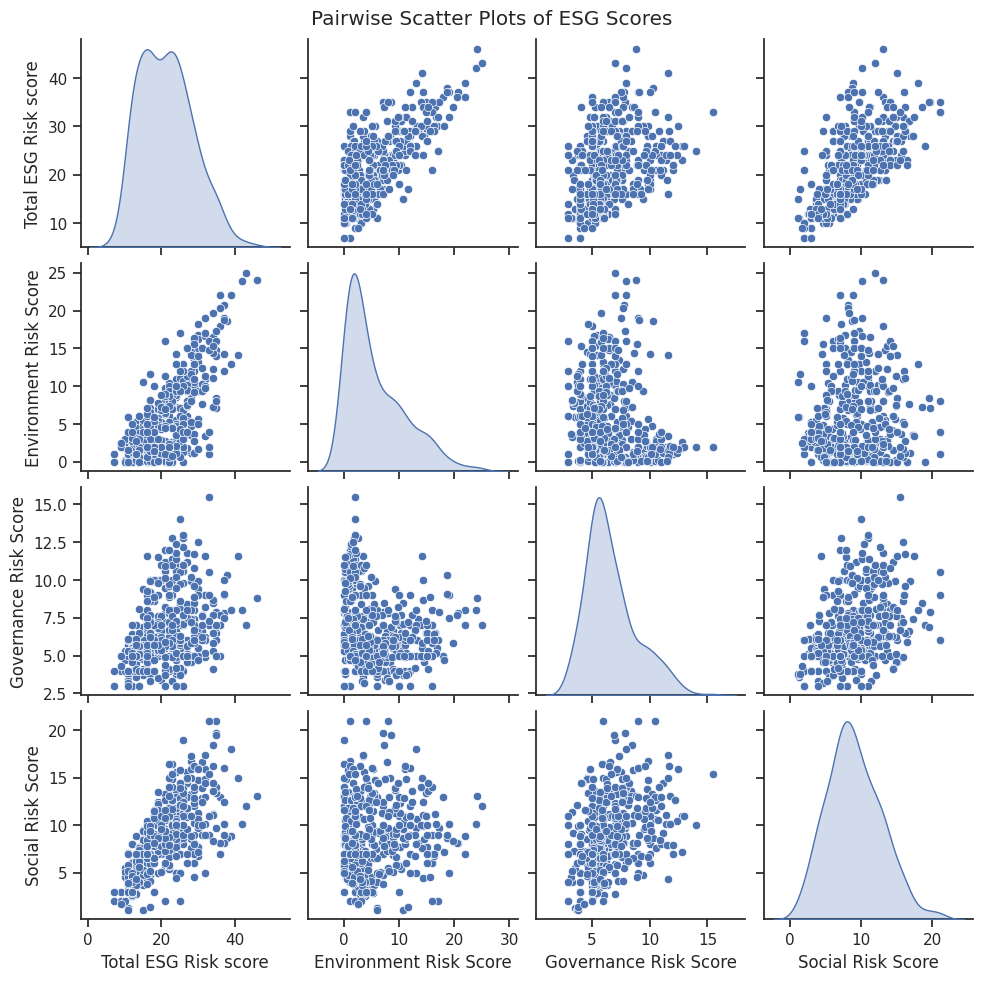

In [28]:
sns.set(style="ticks")
sns.pairplot(esg_scores, kind="scatter", diag_kind="kde", markers="o")
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Scatter Plots of ESG Scores')
plt.show()

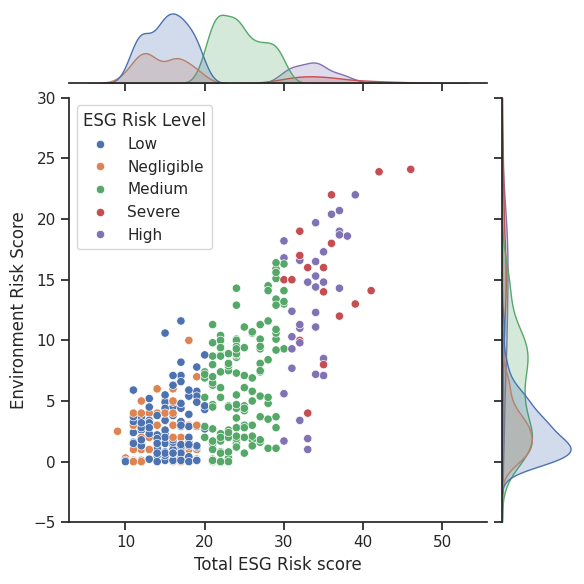

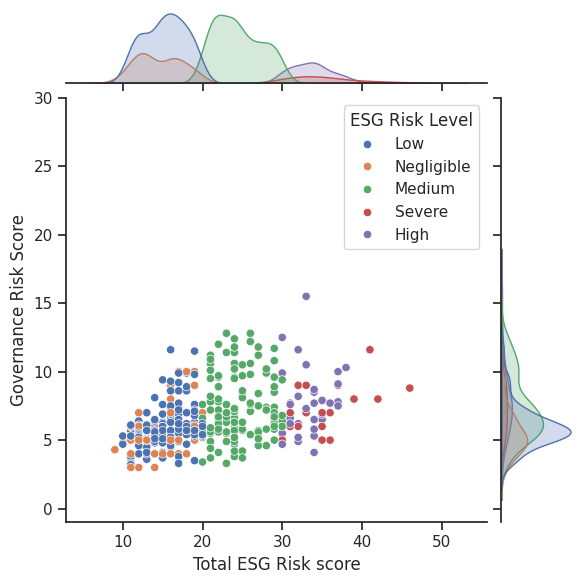

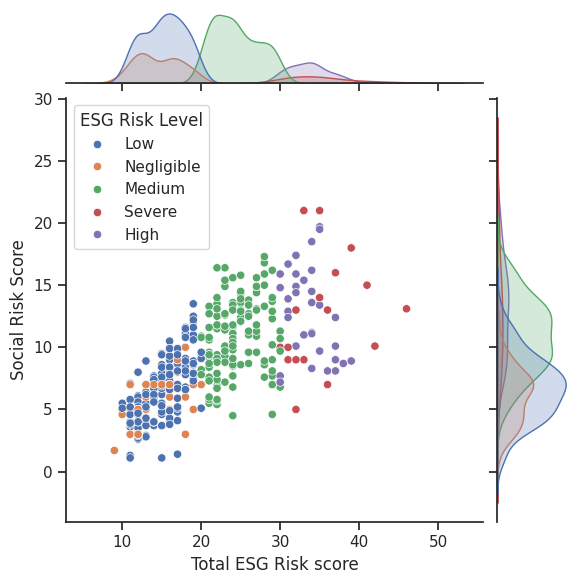

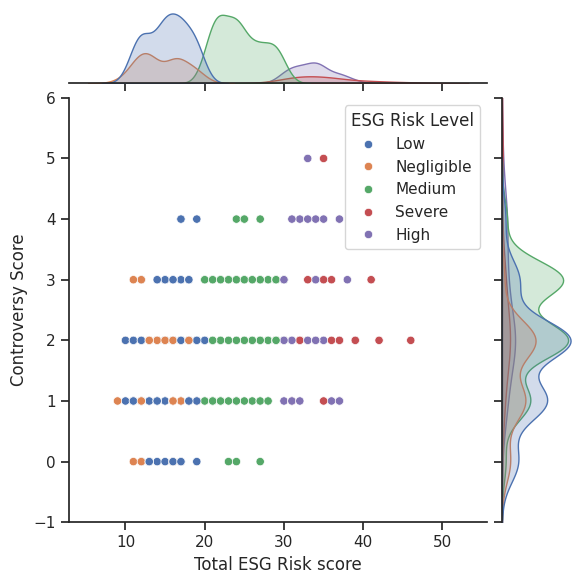

In [29]:
# Plot the jointplots
sns.jointplot(data=data, x="Total ESG Risk score", y="Environment Risk Score", hue="ESG Risk Level", height=6, ylim = (-5,30))
sns.jointplot(data=data, x="Total ESG Risk score", y="Governance Risk Score", hue="ESG Risk Level", height=6, ylim = (-1,30))
sns.jointplot(data=data, x="Total ESG Risk score", y="Social Risk Score", hue="ESG Risk Level", height=6)
sns.jointplot(data=data, x="Total ESG Risk score", y="Controversy Score", hue="ESG Risk Level", height=6, ylim = (-1,6))


In [30]:

# Calculate industry-wise average ESG scores
sector_avg_scores = data.groupby('Sector')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

# Define custom colors
custom_colors = {
#     'Total ESG Risk score': "#6528F7",
    'Environment Risk Score': "#E67E22",
    'Governance Risk Score': "#2471A3",
    'Social Risk Score': "#3498DB"
}


# Create a visual plot for industry-wise average ESG scores with custom colors and enhanced styling
fig_sector = px.bar(sector_avg_scores, x='Sector', y=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                      title='Sector-wise Average ESG Scores',
                      labels={'value': 'Average Score', 'variable': 'ESG Component'},
                      color_discrete_map=custom_colors)
                      #template='plotly_dark'  # Dark background template for a visually pleasing look

# Customize the layout
fig_sector.update_xaxes(categoryorder='total ascending')
fig_sector.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Show the plots
fig_sector.show()

In [31]:

# Calculate industry-wise average ESG scores
industry_avg_scores = data.groupby('Industry')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

# Define custom colors
custom_colors = {
#     'Total ESG Risk score': "#6528F7",
    'Environment Risk Score': "#E67E22",
    'Governance Risk Score': "#2471A3",
    'Social Risk Score': "#3498DB"
}


# Create a visual plot for industry-wise average ESG scores with custom colors and enhanced styling
fig_industry = px.bar(industry_avg_scores, x='Industry', y=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
title='Industry-wise Average ESG Scores', labels={'value': 'Average Score', 'variable': 'ESG Component'},
color_discrete_map=custom_colors)
#template='plotly_dark'  # Dark background template for a visually pleasing look

# Customize the layout
fig_industry.update_xaxes(categoryorder='total ascending')
fig_industry.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Show the plots
fig_industry.show()